In [8]:
import sys
import os
import glob
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from matplotlib.ticker import FormatStrFormatter

import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x384x128/with_LAD/'
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(-Ly/2.,Ly/2.,Ny)
x = np.linspace(0.,Lx,int(Nx))
z = np.linspace(0.,Lx,int(Nx))

flist = glob.glob(directory+"*hhdecomp*dat")
flist.sort()
print([f.split('/')[-1] for f in flist])

# And read growth rates
tlist,dlist,rates = growth_rates(directory+'shearlayer_')


Params for this run:
	Mc = 2.0
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024x1448x512
	L = 80.0x80.0x40.0
['shearlayer_hhdecomp_0005.dat', 'shearlayer_hhdecomp_0006.dat', 'shearlayer_hhdecomp_0007.dat', 'shearlayer_hhdecomp_0008.dat', 'shearlayer_hhdecomp_0009.dat', 'shearlayer_hhdecomp_0010.dat', 'shearlayer_hhdecomp_0011.dat', 'shearlayer_hhdecomp_0012.dat', 'shearlayer_hhdecomp_0013.dat']


/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/


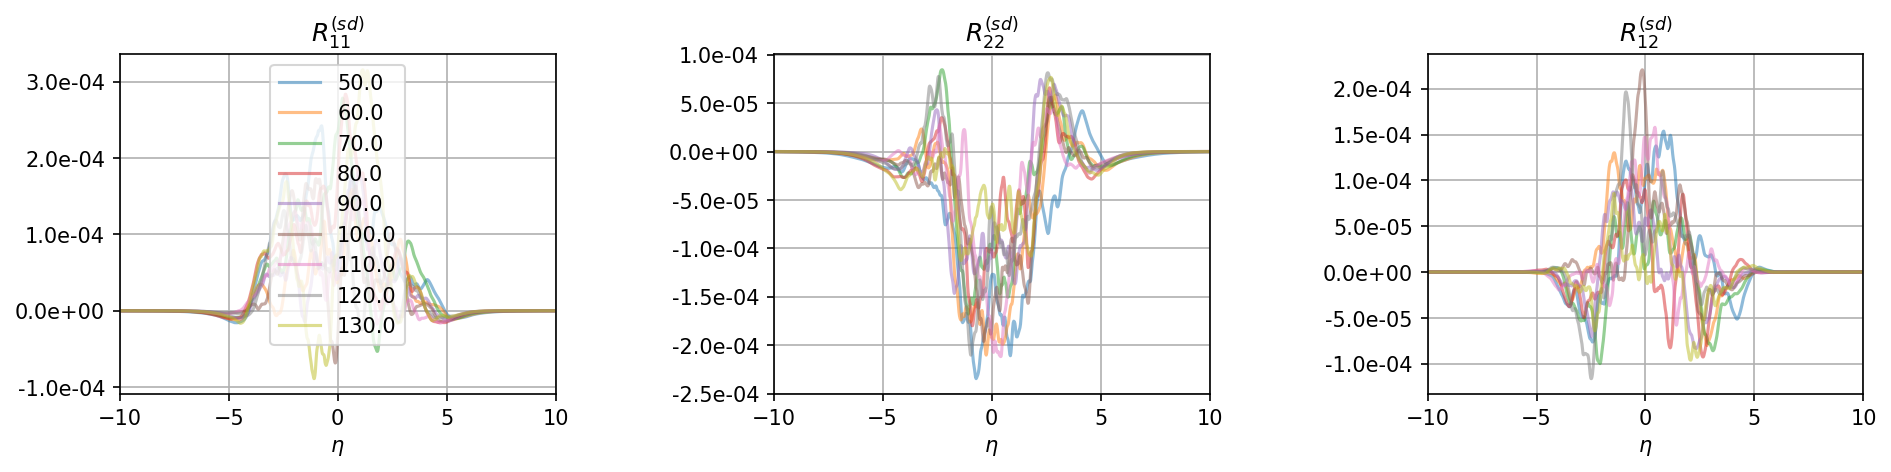

In [9]:
# Get Rij dd,sd profiles
names = ['R11','R22','R12',
        'R11_dd','R22_dd','R12_dd',
        'R11_sd','R22_sd','R12_sd',]

def get_Rij(fname):
    dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
    n = np.size(dat)
    nstats=9
    dat = np.reshape(dat,[n/nstats,nstats])
    Rij_dict = {}
    for i,name in enumerate(names):
        Rij_dict[name] = dat[:,i]
    return Rij_dict


def plot_Rij(directory,flist,savename=''):
            
    fig,ax = plt.subplots(1,3,figsize=(15,3),dpi=150)
    a = 0.5
    for fname in flist:
        tID = fname.split('_')[-1]
        tID = int(tID.split('.dat')[0])
        time = nml.read_time(directory,tID)

        # Get dtheta
        idx = np.argmin(abs(tlist-time))
        dtheta = dlist[idx]
        yplot = y/dtheta

        d = get_Rij(fname)
        ax[0].plot(yplot,d['R11_sd'],alpha=a,label=time)
        ax[1].plot(yplot,d['R22_sd'],alpha=a,label=time)
        ax[2].plot(yplot,d['R12_sd'],alpha=a,label=time)
        plt.subplots_adjust(wspace=0.5)
        
    titles=['$R_{11}^{(sd)}$','$R_{22}^{(sd)}$','$R_{12}^{(sd)}$']
    for i,a in enumerate(ax):
        a.set_title(titles[i])
        a.set_xlim([-10,10])
        a.set_xlabel(r'$\eta$')
        a.grid(True)
        a.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    ax[0].legend()
    
    # set the overall title and save
    # fig.suptitle('Time: {}'.format(np.around(reader.time,-1)),size=fs,y=0.95)
    if savename:
        fig.savefig(savename, dpi=200,bbox_inches='tight')
        plt.close(fig)
        print "Saved plot to ",savename
    else: 
        print(directory)
        fig.show()

plot_Rij(directory,flist[:],savename='')

In [59]:
s = '1'

if s=='1': Mc_list = ['02','04','08','12','16','20']
else: Mc_list = ['02','08','20']

for Mc in Mc_list:
    directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr%s/1024x1448x512/'%(Mc,s)
    inp = nml.inputs(directory,verbose=False)
    Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=False)
    Ny = int(Ny)
    y = np.linspace(-Ly/2.,Ly/2.,Ny)

    flist = glob.glob(directory+"*hh*dat")
    flist.sort()

    tlist,dlist,rates = growth_rates(directory+'shearlayer_')

    # Plot Rij
    plot_Rij(directory,flist,savename=directory+'/img/Rij_sd.png')
print('Done')

Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512//img/Rij_sd.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc04/rr1/1024x1448x512//img/Rij_sd.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/1024x1448x512//img/Rij_sd.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/1024x1448x512//img/Rij_sd.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc16/rr1/1024x1448x512//img/Rij_sd.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512//img/Rij_sd.png
Done


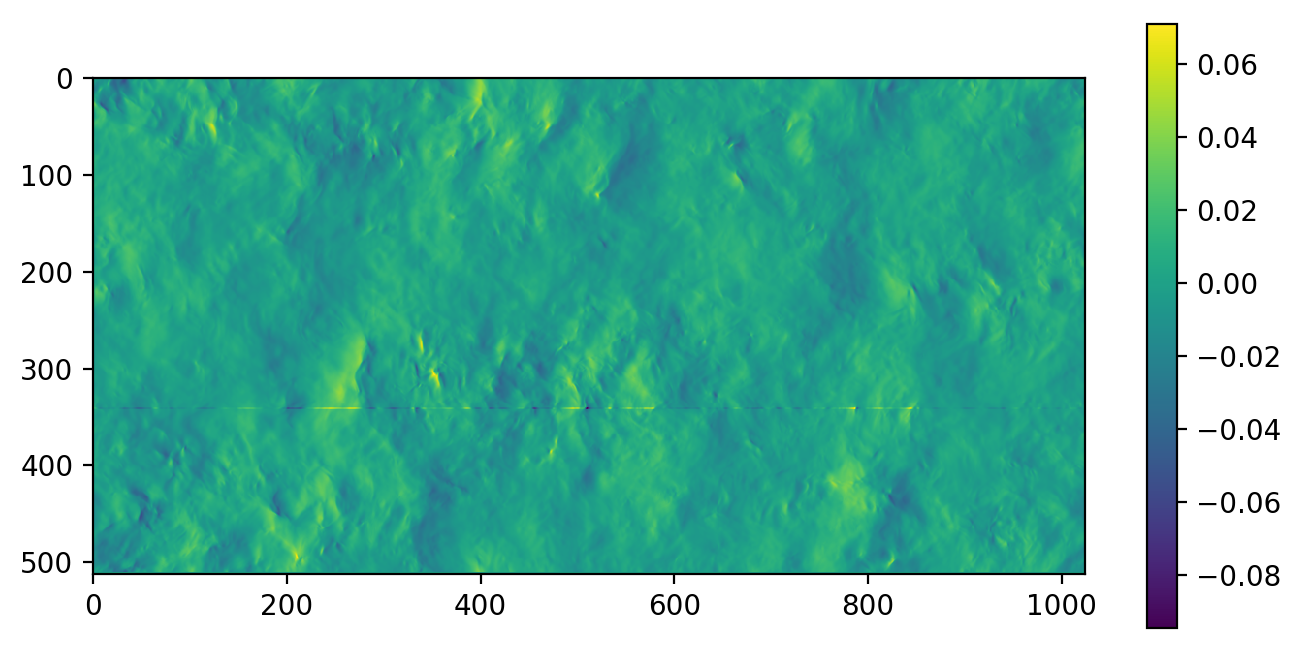

In [4]:
# plot centerline 

plane = np.load(directory+'/shearlayer_xz.npy')

fig = plt.figure(figsize=(8,4),dpi=200)
plt.imshow(plane.transpose())
plt.quiver(x,z, U, V, [C], **kw)
plt.colorbar()